## 爬虫网页地址: http://data.10jqka.com.cn/financial/yjyg/

In [1]:
import requests

result = requests.get('https://www.baidu.com/')
result.text

'<!DOCTYPE html>\r\n<!--STATUS OK--><html> <head><meta http-equiv=content-type content=text/html;charset=utf-8><meta http-equiv=X-UA-Compatible content=IE=Edge><meta content=always name=referrer><link rel=stylesheet type=text/css href=https://ss1.bdstatic.com/5eN1bjq8AAUYm2zgoY3K/r/www/cache/bdorz/baidu.min.css><title>ç\x99¾åº¦ä¸\x80ä¸\x8bï¼\x8cä½\xa0å°±ç\x9f¥é\x81\x93</title></head> <body link=#0000cc> <div id=wrapper> <div id=head> <div class=head_wrapper> <div class=s_form> <div class=s_form_wrapper> <div id=lg> <img hidefocus=true src=//www.baidu.com/img/bd_logo1.png width=270 height=129> </div> <form id=form name=f action=//www.baidu.com/s class=fm> <input type=hidden name=bdorz_come value=1> <input type=hidden name=ie value=utf-8> <input type=hidden name=f value=8> <input type=hidden name=rsv_bp value=1> <input type=hidden name=rsv_idx value=1> <input type=hidden name=tn value=baidu><span class="bg s_ipt_wr"><input id=kw name=wd class=s_ipt value maxlength=255 autocomplete=off au

# 状态码
- 20 请求成功
- 30 请求条状
- 40 客户端错误
- 50 服务端错误

In [4]:
result = requests.get('http://data.10jqka.com.cn/financial/yjyg/')
result

<Response [200]>

In [5]:
result.text

'<!DOCTYPE html>\n<html>\n<head lang="en">\n    <meta http-equiv="Content-Type" content="text/html; charset=gbk" />\n    <!–[if lte IE 8]>\n    <meta http-equiv="X-UA-Compatible" content="IE=EmulateIE7" />\n    <![endif]–>\n    <!–[if IE 9]>\n    <meta http-equiv="X-UA-Compatible" content="IE=EmulateIE7;IE=9"/>\n    <![endif]–>\n    <title>业绩预告_数据中心_同花顺财经</title>\n    <meta name="Keywords" content="业绩预告,业绩预增,中报业绩预告,年报业绩预告,业绩预减,净利润变动,两市业绩预告一览" />\n    <meta name="Description" content="同花顺财经财报提供上市公司最新业绩预告、业绩预增、中报业绩预告及年报业绩预告，为投资者提供两市业绩预告一览和业绩预减、净利润变动等数据。" />\n            <link rel="stylesheet" href="//s.thsi.cn/css/datacenter/financial/base.css"/>\r\n    \t\t\t\t<link rel="stylesheet" href="//s.thsi.cn/css/datacenter/financial/page-202008032148.min.css"/>\r\n\t\t\t    <link rel="stylesheet" href="//s.thsi.cn/css/datacenter/iwcxg.css"/>\r\n    <link rel="stylesheet" href="//s.thsi.cn/css/datacenter/hqcss.css"/>\r\n        <style type="text/css">\r\n        \r\n        .title {position: rel

In [7]:
import re
# 获取索引
index = re.findall('<td>(.*)</td>',result.text)
# 获取股票代码
stock_code = re.findall('class="stockCode">(.*)</a>',result.text)
# 获取股票名称 
stock_name = re.findall('class="J_showCanvas">(.*)</a>',result.text)
# 获取业绩数据
performance = re.findall('<span>(.*)</span>',result.text)

# 获取摘要数据
summary = re.findall('target="_blank">(.*)</a>',result.text)

In [10]:
index[1]

'2'

# 第二种数据抓取方式

In [11]:
# 为了获取多页数据，我们来观察翻页后url的变化
# http://data.10jqka.com.cn/ajax/yjyg/date/2021-03-31/board/ALL/field/enddate/order/desc/ajax/1/free/1/
# http://data.10jqka.com.cn/ajax/yjyg/date/2021-03-31/board/ALL/field/enddate/order/desc/page/1/ajax/1/free/1/
# http://data.10jqka.com.cn/ajax/yjyg/date/2021-03-31/board/ALL/field/enddate/order/desc/page/2/ajax/1/free/1/
# http://data.10jqka.com.cn/ajax/yjyg/date/2021-03-31/board/ALL/field/enddate/order/desc/page/3/ajax/1/free/1/

In [19]:
result = requests.get('http://data.10jqka.com.cn/ajax/yjyg/date/2022-12-31/board/ALL/field/enddate/order/desc/ajax/1/free/1/')



result


<Response [403]>

In [22]:
# 获取第一页的内容
headers = {
    'Accept':'text/html, */*; q=0.01',
    'Accept-Encoding':'gzip, deflate',
    'Accept-Language':'en-US,en;q=0.9,zh-CN;q=0.8,zh;q=0.7',
    'Cookie':'Hm_lvt_60bad21af9c824a4a0530d5dbf4357ca=1667482212,1669660827; Hm_lvt_f79b64788a4e377c608617fba4c736e2=1667482212,1669660827; Hm_lvt_78c58f01938e4d85eaf619eae71b4ed1=1667482212,1669660828; Hm_lpvt_f79b64788a4e377c608617fba4c736e2=1669661634; Hm_lpvt_60bad21af9c824a4a0530d5dbf4357ca=1669661635; Hm_lpvt_78c58f01938e4d85eaf619eae71b4ed1=1669661635; v=AyhTvl0g30_jxfPKkYq1mxIh-R0_UYwrbrVgzeJZdKOWPcaDimFc677FMG0x',
    'hexin-v':'AyhTvl0g30_jxfPKkYq1mxIh-R0_UYwrbrVgzeJZdKOWPcaDimFc677FMG0x',
    'Host':'data.10jqka.com.cn',
    'Proxy-Connection':'keep-alive',
    'Referer':'http://data.10jqka.com.cn/financial/yjyg/',
    'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36',
    'X-Requested-With':'XMLHttpRequest'
}
url = 'http://data.10jqka.com.cn/ajax/yjyg/date/2022-12-31/board/ALL/field/enddate/order/desc/ajax/1/free/1/'
result = requests.get(url,headers=headers)
result

<Response [200]>

In [23]:
result.text

'     <div class="page-loading" style="display: none;">\n        <div class="mask"></div>\n        <div class="loading-img"></div>\n    </div>\n     <table class="m-table J-ajax-table J-canvas-table">\n        <thead>\n        <tr class="row2">\n            <th width="40" >序号</th>\n            <th width="78" ><a href=\'javascript:void(0);\' class="J-ajax-a" field=\'stockcode\'  colidx="1"><a href="javascript:void(0);" class="J-ajax-a" field="STOCKCODE">股票代码</a><i class="arr-down"></i></th>\n            <th width="78" >股票简称</th>\n            <th width="115" ><a href=\'javascript:void(0);\' class="J-ajax-a" field=\'summ\' ><a href="javascript:void(0);" class="J-ajax-a">业绩预告类型</a><i class="arr-down"></i></th>\n            <th width="350">业绩预告摘要</th>\n            <th width="97" ><a href="javascript:void(0);" class="J-ajax-a" field=\'jlrbl\' >净利润变动幅度<br/>(%)</a><i class="arr-down"></i></th>\n            <th width="135" ><a href="javascript:void(0);" class="J-ajax-a" field=\'SNTQJLR\' >上年同期净

In [24]:
# 获取索引
index = re.findall('<td>(.*)</td>',result.text)
# 获取股票代码
stock_code = re.findall('class="stockCode">(.*)</a>',result.text)
# 获取股票名称 
stock_name = re.findall('class="J_showCanvas">(.*)</a>',result.text)
# 获取业绩数据
performance = re.findall('<span>(.*)</span>',result.text)

# 获取摘要数据
summary = re.findall('target="_blank">(.*)</a>',result.text)

In [27]:
import requests
# 获取多页内容
headers = {
    'Accept':'text/html, */*; q=0.01',
    'Accept-Encoding':'gzip, deflate',
    'Accept-Language':'en-US,en;q=0.9,zh-CN;q=0.8,zh;q=0.7',
    'Cookie':'Hm_lvt_60bad21af9c824a4a0530d5dbf4357ca=1667482212,1669660827; Hm_lvt_f79b64788a4e377c608617fba4c736e2=1667482212,1669660827; Hm_lvt_78c58f01938e4d85eaf619eae71b4ed1=1667482212,1669660828; Hm_lpvt_f79b64788a4e377c608617fba4c736e2=1669661634; Hm_lpvt_60bad21af9c824a4a0530d5dbf4357ca=1669661635; Hm_lpvt_78c58f01938e4d85eaf619eae71b4ed1=1669661635; v=AyhTvl0g30_jxfPKkYq1mxIh-R0_UYwrbrVgzeJZdKOWPcaDimFc677FMG0x',
    'hexin-v':'AyhTvl0g30_jxfPKkYq1mxIh-R0_UYwrbrVgzeJZdKOWPcaDimFc677FMG0x',
    'Host':'data.10jqka.com.cn',
    'Proxy-Connection':'keep-alive',
    'Referer':'http://data.10jqka.com.cn/financial/yjyg/',
    'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36',
    'X-Requested-With':'XMLHttpRequest'
}
url = 'http://data.10jqka.com.cn/ajax/yjyg/date/2022-12-31/board/ALL/field/enddate/order/desc/page/{}/ajax/1/free/1/'
result = ""
for i in range(1,3):
    result += requests.get(url.format(i),headers=headers).text
result

'     <div class="page-loading" style="display: none;">\n        <div class="mask"></div>\n        <div class="loading-img"></div>\n    </div>\n     <table class="m-table J-ajax-table J-canvas-table">\n        <thead>\n        <tr class="row2">\n            <th width="40" >序号</th>\n            <th width="78" ><a href=\'javascript:void(0);\' class="J-ajax-a" field=\'stockcode\'  colidx="1"><a href="javascript:void(0);" class="J-ajax-a" field="STOCKCODE">股票代码</a><i class="arr-down"></i></th>\n            <th width="78" >股票简称</th>\n            <th width="115" ><a href=\'javascript:void(0);\' class="J-ajax-a" field=\'summ\' ><a href="javascript:void(0);" class="J-ajax-a">业绩预告类型</a><i class="arr-down"></i></th>\n            <th width="350">业绩预告摘要</th>\n            <th width="97" ><a href="javascript:void(0);" class="J-ajax-a" field=\'jlrbl\' >净利润变动幅度<br/>(%)</a><i class="arr-down"></i></th>\n            <th width="135" ><a href="javascript:void(0);" class="J-ajax-a" field=\'SNTQJLR\' >上年同期净

In [28]:
import re
# 获取索引
index = re.findall('<td>(.*)</td>',result)
# 获取股票代码
stock_code = re.findall('class="stockCode">(.*)</a>',result)
# 获取股票名称 
stock_name = re.findall('class="J_showCanvas">(.*)</a>',result)
# 获取业绩数据
performance = re.findall('<span>(.*)</span>',result)

# 获取摘要数据
summary = re.findall('target="_blank">(.*)</a>',result)

# 把以上获取到的数据变成DataFrame数据类型

In [30]:
import pandas as pd 
import matplotlib.pyplot as plt

data = pd.DataFrame({
    
    "stock_code":stock_code,
    "stock_name":stock_name,
    "performance":performance,
    "summary":summary
},index=index)

In [33]:
data.head()

,performance,stock_code,stock_name,summary
1,业绩预盈,001223,欧克科技,"净利润20566.07万元至23632.41万元,增长幅度为-10.04%至3.37%"
2,业绩预降,301265,华新环保,"净利润11500.00万元至13000.00万元,下降幅度为26.43%至16.83%"
3,业绩预增,301398,星源卓镁,"净利润6061.35万元至6191.35万元,增长幅度为12.99%至15.41%"
4,业绩预降,301368,丰立智能,"净利润4900万元至5800万元,下降幅度为19.4%至4.59%"
5,业绩预盈,430300,辰光医疗,"净利润2048.81万元至2442.43万元,增长幅度为-12.23%至4.63%"


In [34]:
# 算利润
data['start_profit'] = data['summary'].str.extract('(-{0,1}\d{0,10}\.{0,1}\d{0,10})万元')
data['end_profit'] = data['summary'].str.extract('至(-{0,1}\d{0,10}\.{0,1}\d{0,10})万元')
data.head()

D:\Anaconda\envs\py36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  
D:\Anaconda\envs\py36\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  This is separate from the ipykernel package so we can avoid doing imports until


,performance,stock_code,stock_name,summary,start_profit,end_profit
1,业绩预盈,001223,欧克科技,"净利润20566.07万元至23632.41万元,增长幅度为-10.04%至3.37%",20566.07,23632.41
2,业绩预降,301265,华新环保,"净利润11500.00万元至13000.00万元,下降幅度为26.43%至16.83%",11500.00,13000.00
3,业绩预增,301398,星源卓镁,"净利润6061.35万元至6191.35万元,增长幅度为12.99%至15.41%",6061.35,6191.35
4,业绩预降,301368,丰立智能,"净利润4900万元至5800万元,下降幅度为19.4%至4.59%",4900,5800
5,业绩预盈,430300,辰光医疗,"净利润2048.81万元至2442.43万元,增长幅度为-12.23%至4.63%",2048.81,2442.43


In [35]:
data['performance'].unique()

array(['业绩预盈', '业绩预降', '业绩预增', '业绩大幅上升', '不确定', '预计续亏', '预计扭亏'],
      dtype=object)

In [36]:
data['performance'].nunique()

7

In [37]:
# 设置一个亏损的字段，亏损的字段值为-1，盈利的字段值为1
# 盈利：  '业绩预增', '业绩大幅上升', '预计扭亏'
# 亏损： '预计减亏', '业绩大幅下降', '业绩预亏', '预计增亏', '业绩预降','预计续亏'

def if_profit(x):
    if x in ['业绩预增', '业绩大幅上升', '预计扭亏']:
        return 1
    if x in ['预计减亏', '业绩大幅下降', '业绩预亏', '预计增亏', '业绩预降','预计续亏']:
        return -1
    return 0
    

In [40]:
data['is_profit'] = data.apply(lambda x : if_profit(x['performance']), axis=1)
data

,performance,stock_code,stock_name,summary,start_profit,end_profit,is_profit
1,业绩预盈,001223,欧克科技,"净利润20566.07万元至23632.41万元,增长幅度为-10.04%至3.37%",20566.07,23632.41,0
2,业绩预降,301265,华新环保,"净利润11500.00万元至13000.00万元,下降幅度为26.43%至16.83%",11500.00,13000.00,-1
3,业绩预增,301398,星源卓镁,"净利润6061.35万元至6191.35万元,增长幅度为12.99%至15.41%",6061.35,6191.35,1
4,业绩预降,301368,丰立智能,"净利润4900万元至5800万元,下降幅度为19.4%至4.59%",4900,5800,-1
5,业绩预盈,430300,辰光医疗,"净利润2048.81万元至2442.43万元,增长幅度为-12.23%至4.63%",2048.81,2442.43,0
6,业绩大幅上升,688503,聚和股份,"净利润36000.00万元至40000.00万元,增长幅度为45.88%至62.09%",36000.00,40000.00,1
7,业绩预盈,301365,矩阵股份,"净利润18500万元至23100万元,增长幅度为-15.85%至5.07%",18500,23100,0
8,业绩预增,301377,鼎泰高科,"净利润23955万元至24555万元,增长幅度为0.79%至3.31%",23955,24555,1
9,业绩预盈,688084,晶品特装,"净利润5200万元至7500万元,增长幅度为-13.24%至25.13%",5200,7500,0
10,业绩大幅上升,688420,美腾科技,"净利润11000万元至13400万元,增长幅度为28.1%至56.6%",11000,13400,1


In [42]:
import numpy as np
yingli = np.sum(data['is_profit']==1)
yingli

28

In [43]:
kuisun = np.sum(data['is_profit']==-1)
kuisun

13

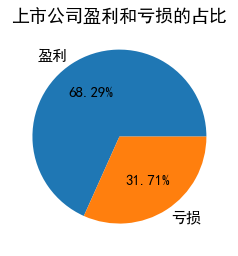

In [44]:
font = {'family':'SimHei','size':15}
plt.rc('font',**font)
plt.pie([yingli,kuisun], labels=['盈利','亏损'], autopct="%.2f%%")
plt.title("上市公司盈利和亏损的占比")
plt.show()